In [417]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPooling2D, Reshape, Dropout
from keras.models import Model, load_model, Sequential
from keras.initializers import glorot_uniform
from keras.optimizers import Adam, SGD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_mnist = pd.read_csv('mnist.csv')
train_mnist = np.array(df_mnist.values)

In [124]:
def draw_train_val(tr_v_dict):
    train_acc = tr_v_dict['acc']
    val_acc = tr_v_dict['val_acc']
    arr = np.arange(len(val_acc))
    plt.plot(arr, train_acc, color='r', label='train')
    plt.plot(arr, val_acc, color='b', label='val')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

In [42]:
classes = np.unique(train_mnist[:,0])
cls_data = {}
for i in classes:
    cls_data[i] = np.argwhere(train_mnist[:,0]==i)
    cls_data[i] = cls_data[i][:,0]
train = np.array([np.ones(train_mnist.shape[1])])
val = np.array([np.ones(train_mnist.shape[1])])
test = np.array([np.ones(train_mnist.shape[1])])
for i in classes:
    ln = cls_data[i].shape[0]
    l1 = ln*8//10
    l2 = ln*9//10
    train = np.concatenate((train, train_mnist[cls_data[i][:l1]]), axis=0)
    val = np.concatenate((val, train_mnist[cls_data[i][l1:l2]]), axis=0)
    test = np.concatenate((test, train_mnist[cls_data[i][l2:]]), axis=0)
train = train[1:]
val = val[1:]
test = test[1:]
np.random.shuffle(train)
np.random.shuffle(val)
np.random.shuffle(test)

In [43]:
def convert_to_xy(data):
    X = data[:,1:]
    Y_t = data[:,0]
    Y = np.zeros((data.shape[0], 10))
    Y_t = np.array(Y_t, dtype=int)
    Y[np.arange(data.shape[0]),Y_t] += 1
    return X, Y

In [44]:
train_X, train_Y = convert_to_xy(train)
val_X, val_Y = convert_to_xy(val)
test_X, test_Y = convert_to_xy(test)
X, Y = convert_to_xy(train_mnist)

In [381]:
###1###
def mod_v1(input_shape):
    X_input = Input(input_shape)
    X = X_input
    X = Dense(10)(X)
    X = Activation('softmax')(X)
    model = Model(inputs = X_input, outputs = X, name='mod_v1')
    return model

In [400]:
model_1 = mod_v1((train_mnist.shape[1]-1,))

In [401]:
model_1.compile(optimizer=SGD(lr=0.1), loss='mean_squared_logarithmic_error', metrics=['accuracy'])

In [402]:
ht_1 = model_1.fit(train_X, train_Y, validation_data=(val_X, val_Y), epochs = 300, batch_size = 100)

Train on 7997 samples, validate on 999 samples
Epoch 1/300
7997/7997 [==============================] - 6s 698us/step - loss: 0.0747 - acc: 0.2198 - val_loss: 0.0653 - val_acc: 0.3193
Epoch 2/300
7997/7997 [==============================] - 0s 47us/step - loss: 0.0624 - acc: 0.3483 - val_loss: 0.0581 - val_acc: 0.3924
Epoch 3/300
7997/7997 [==============================] - 0s 47us/step - loss: 0.0562 - acc: 0.4129 - val_loss: 0.0538 - val_acc: 0.4384
Epoch 4/300
7997/7997 [==============================] - 0s 46us/step - loss: 0.0536 - acc: 0.4403 - val_loss: 0.0542 - val_acc: 0.4344
Epoch 5/300
7997/7997 [==============================] - 0s 47us/step - loss: 0.0526 - acc: 0.4515 - val_loss: 0.0499 - val_acc: 0.4795
Epoch 6/300
7997/7997 [==============================] - 0s 47us/step - loss: 0.0519 - acc: 0.4579 - val_loss: 0.0497 - val_acc: 0.4825
Epoch 7/300
7997/7997 [==============================] - 0s 47us/step - loss: 0.0506 - acc: 0.4718 - val_loss: 0.0500 - val_acc: 0.4785


Epoch 120/300
7997/7997 [==============================] - 0s 45us/step - loss: 0.0395 - acc: 0.5883 - val_loss: 0.0392 - val_acc: 0.5916
Epoch 121/300
7997/7997 [==============================] - 0s 47us/step - loss: 0.0395 - acc: 0.5880 - val_loss: 0.0387 - val_acc: 0.5966
Epoch 122/300
7997/7997 [==============================] - 0s 48us/step - loss: 0.0395 - acc: 0.5886 - val_loss: 0.0387 - val_acc: 0.5966
Epoch 123/300
7997/7997 [==============================] - 0s 48us/step - loss: 0.0397 - acc: 0.5861 - val_loss: 0.0386 - val_acc: 0.5976
Epoch 124/300
7997/7997 [==============================] - 0s 48us/step - loss: 0.0395 - acc: 0.5886 - val_loss: 0.0388 - val_acc: 0.5956
Epoch 125/300
7997/7997 [==============================] - 0s 52us/step - loss: 0.0394 - acc: 0.5891 - val_loss: 0.0391 - val_acc: 0.5926
Epoch 126/300
7997/7997 [==============================] - 0s 49us/step - loss: 0.0396 - acc: 0.5876 - val_loss: 0.0388 - val_acc: 0.5956
Epoch 127/300
7997/7997 [=========

7997/7997 [==============================] - 0s 44us/step - loss: 0.0390 - acc: 0.5931 - val_loss: 0.0388 - val_acc: 0.5956
Epoch 239/300
7997/7997 [==============================] - 0s 45us/step - loss: 0.0391 - acc: 0.5928 - val_loss: 0.0388 - val_acc: 0.5956
Epoch 240/300
7997/7997 [==============================] - 0s 49us/step - loss: 0.0392 - acc: 0.5917 - val_loss: 0.0392 - val_acc: 0.5926
Epoch 241/300
7997/7997 [==============================] - 0s 51us/step - loss: 0.0392 - acc: 0.5912 - val_loss: 0.0383 - val_acc: 0.6016
Epoch 242/300
7997/7997 [==============================] - 0s 47us/step - loss: 0.0392 - acc: 0.5918 - val_loss: 0.0385 - val_acc: 0.5986
Epoch 243/300
7997/7997 [==============================] - 0s 44us/step - loss: 0.0391 - acc: 0.5923 - val_loss: 0.0385 - val_acc: 0.5986
Epoch 244/300
7997/7997 [==============================] - 0s 45us/step - loss: 0.0391 - acc: 0.5922 - val_loss: 0.0384 - val_acc: 0.5996
Epoch 245/300
7997/7997 [=======================

In [406]:
print("train accuracy: " + str(ht_1.history['acc'][-1]))
print("val accuracy: " + str(ht_1.history['val_acc'][-1]))
print("test accuracy: " + str(model_1.evaluate(test_X, test_Y)[1]))

train accuracy: 0.593722647289
val accuracy: 0.597597599925
1004/1004 [==============================] - 0s 86us/step
test accuracy: 0.574701194982


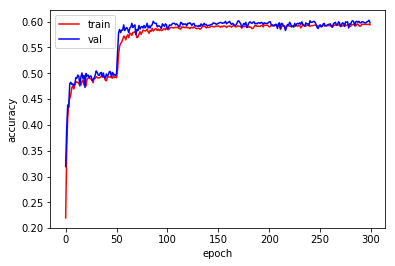

In [403]:
draw_train_val(ht_1.history)

In [423]:
###2###
def mod_v2(input_shape):
    X_input = Input(input_shape)
    X = X_input
    X = Dense(1024)(X)
    X = Activation('tanh')(X)
    X = Dense(10)(X)
    X = Activation('softmax')(X)
    model = Model(inputs = X_input, outputs = X, name='mod_v2')
    return model

In [424]:
model_2 = mod_v2((train_mnist.shape[1]-1,))

In [425]:
model_2.compile(optimizer=SGD(lr=0.06), loss='mean_squared_logarithmic_error', metrics=['accuracy'])

In [426]:
ht_2 = model_2.fit(train_X, train_Y, validation_data=(val_X, val_Y), epochs = 30, batch_size = 100)

Train on 7997 samples, validate on 999 samples
Epoch 1/30
7997/7997 [==============================] - 7s 863us/step - loss: 0.0411 - acc: 0.3156 - val_loss: 0.0274 - val_acc: 0.5816
Epoch 2/30
7997/7997 [==============================] - 1s 142us/step - loss: 0.0246 - acc: 0.6267 - val_loss: 0.0169 - val_acc: 0.7748
Epoch 3/30
7997/7997 [==============================] - 1s 137us/step - loss: 0.0172 - acc: 0.7599 - val_loss: 0.0122 - val_acc: 0.8448
Epoch 4/30
7997/7997 [==============================] - 1s 137us/step - loss: 0.0131 - acc: 0.8274 - val_loss: 0.0101 - val_acc: 0.8799
Epoch 5/30
7997/7997 [==============================] - 1s 135us/step - loss: 0.0107 - acc: 0.8672 - val_loss: 0.0089 - val_acc: 0.8929
Epoch 6/30
7997/7997 [==============================] - 1s 135us/step - loss: 0.0091 - acc: 0.8920 - val_loss: 0.0083 - val_acc: 0.8979
Epoch 7/30
7997/7997 [==============================] - 1s 139us/step - loss: 0.0078 - acc: 0.9132 - val_loss: 0.0076 - val_acc: 0.9099
E

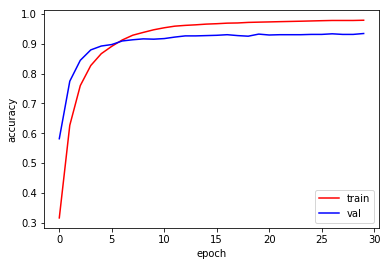

In [427]:
draw_train_val(ht_2.history)

In [428]:
print("train accuracy: " + str(ht_2.history['acc'][-1]))
print("val accuracy: " + str(ht_2.history['val_acc'][-1]))
print("test accuracy: " + str(model_2.evaluate(test_X, test_Y)[1]))

train accuracy: 0.979492317867
val accuracy: 0.93493493935
1004/1004 [==============================] - 0s 137us/step
test accuracy: 0.876494023904


In [470]:
###3###
def mod_v3(input_shape):
    X_input = Input(input_shape)
    X = Reshape((28,28,1))(X_input)
    X = Conv2D(32, (5, 5), strides = (2, 2), kernel_initializer = glorot_uniform(seed=0))(X)
    X = Activation('relu')(X)
    X = Flatten()(X)
    X = Dense(1024)(X)
    X = Activation('tanh')(X)
    X = Dense(10)(X)
    X = Activation('softmax')(X)
    model = Model(inputs = X_input, outputs = X, name='mod_v3')
    return model

In [471]:
model_3 = mod_v3((28,28))

In [472]:
model_3.compile(optimizer=SGD(lr=0.2), loss='mean_squared_logarithmic_error', metrics=['accuracy'])

In [473]:
ht_3 = model_3.fit(train_X.reshape(train_X.shape[0], 28, 28), train_Y, validation_data=(val_X.reshape(val_X.shape[0], 28, 28), val_Y), epochs = 30, batch_size = 100)

Train on 7997 samples, validate on 999 samples
Epoch 1/30
7997/7997 [==============================] - 12s 2ms/step - loss: 0.0179 - acc: 0.7369 - val_loss: 0.0073 - val_acc: 0.9069
Epoch 2/30
7997/7997 [==============================] - 6s 790us/step - loss: 0.0083 - acc: 0.8986 - val_loss: 0.0051 - val_acc: 0.9439
Epoch 3/30
7997/7997 [==============================] - 6s 748us/step - loss: 0.0066 - acc: 0.9197 - val_loss: 0.0042 - val_acc: 0.9580
Epoch 4/30
7997/7997 [==============================] - 6s 778us/step - loss: 0.0055 - acc: 0.9374 - val_loss: 0.0041 - val_acc: 0.9499
Epoch 5/30
7997/7997 [==============================] - 6s 737us/step - loss: 0.0048 - acc: 0.9442 - val_loss: 0.0034 - val_acc: 0.9630
Epoch 6/30
7997/7997 [==============================] - 7s 813us/step - loss: 0.0043 - acc: 0.9546 - val_loss: 0.0034 - val_acc: 0.9590
Epoch 7/30
7997/7997 [==============================] - 7s 841us/step - loss: 0.0038 - acc: 0.9590 - val_loss: 0.0030 - val_acc: 0.9610
Ep

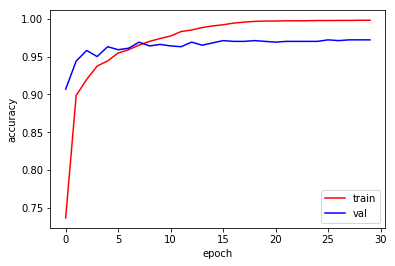

In [474]:
draw_train_val(ht_3.history)

In [475]:
print("train accuracy: " + str(ht_3.history['acc'][-1]))
print("val accuracy: " + str(ht_3.history['val_acc'][-1]))
print("test accuracy: " + str(model_3.evaluate(test_X.reshape(test_X.shape[0], 28, 28), test_Y)[1]))

train accuracy: 0.997874204727
val accuracy: 0.971971990766
1004/1004 [==============================] - 0s 306us/step
test accuracy: 0.946215139442


In [443]:
###4###
def mod_v4(input_shape):
    X_input = Input(input_shape)
    X = Reshape((28,28,1))(X_input)
    X = Conv2D(32, (5, 5), strides = (2, 2), kernel_initializer = glorot_uniform(seed=0))(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)
    X = Flatten()(X)
    X = Dense(1024)(X)
    X = Activation('tanh')(X)
    X = Dense(10)(X)
    X = Activation('softmax')(X)
    model = Model(inputs = X_input, outputs = X, name='mod_v4')
    return model

In [444]:
model_4 = mod_v4((28,28))

In [445]:
model_4.compile(optimizer='adam', loss='mean_squared_logarithmic_error', metrics=['accuracy'])

In [446]:
ht_4 = model_4.fit(train_X.reshape(train_X.shape[0], 28, 28), train_Y, validation_data=(val_X.reshape(val_X.shape[0], 28, 28), val_Y), epochs = 30, batch_size = 100)

Train on 7997 samples, validate on 999 samples
Epoch 1/30
7997/7997 [==============================] - 8s 1ms/step - loss: 0.0224 - acc: 0.6951 - val_loss: 0.0127 - val_acc: 0.8509
Epoch 2/30
7997/7997 [==============================] - 3s 380us/step - loss: 0.0133 - acc: 0.8284 - val_loss: 0.0101 - val_acc: 0.8659
Epoch 3/30
7997/7997 [==============================] - 3s 379us/step - loss: 0.0108 - acc: 0.8558 - val_loss: 0.0088 - val_acc: 0.8739
Epoch 4/30
7997/7997 [==============================] - 3s 375us/step - loss: 0.0099 - acc: 0.8631 - val_loss: 0.0081 - val_acc: 0.8839
Epoch 5/30
7997/7997 [==============================] - 3s 369us/step - loss: 0.0092 - acc: 0.8705 - val_loss: 0.0084 - val_acc: 0.8749
Epoch 6/30
7997/7997 [==============================] - 3s 364us/step - loss: 0.0086 - acc: 0.8755 - val_loss: 0.0076 - val_acc: 0.8889
Epoch 7/30
7997/7997 [==============================] - 3s 370us/step - loss: 0.0083 - acc: 0.8791 - val_loss: 0.0077 - val_acc: 0.8819
Epo

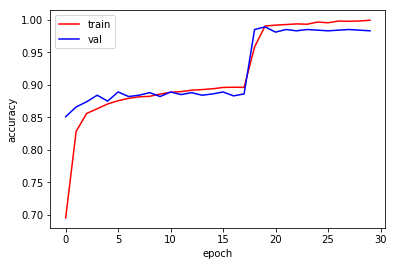

In [447]:
draw_train_val(ht_4.history)

In [448]:
print("train accuracy: " + str(ht_4.history['acc'][-1]))
print("val accuracy: " + str(ht_4.history['val_acc'][-1]))
print("test accuracy: " + str(model_4.evaluate(test_X.reshape(test_X.shape[0], 28, 28), test_Y)[1]))

train accuracy: 0.99924971936
val accuracy: 0.982982991276
1004/1004 [==============================] - 0s 227us/step
test accuracy: 0.980079681275


In [449]:
###5###
def mod_v5(input_shape, drop):
    X_input = Input(input_shape)
    X = Reshape((28,28,1))(X_input)
    X = Conv2D(32, (5, 5), strides = (2, 2), kernel_initializer = glorot_uniform(seed=0))(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)
    X = Flatten()(X)
    X = Dense(1024)(X)
    X = Dropout(drop)(X)
    X = Activation('tanh')(X)
    X = Dense(10)(X)
    X = Activation('softmax')(X)
    model = Model(inputs = X_input, outputs = X, name='mod_v5')
    return model

In [362]:
max_drop = 0
max_val_acc = 0
for i in np.arange(0.0,0.95,0.01):
    np.random.seed(13)
    print("Dropout: " + str(i))
    model_5 = mod_v5((28,28), i)
    model_5.compile(optimizer=SGD(lr=0.02), loss='mean_squared_logarithmic_error', metrics=['accuracy'])
    ht_5 = model_5.fit(train_X.reshape(train_X.shape[0], 28, 28), train_Y, validation_data=(val_X.reshape(val_X.shape[0], 28, 28), val_Y), epochs = 10, batch_size = 100)
    if ht_5.history['val_acc'][-1] > max_val_acc:
        max_val_acc = ht_5.history['val_acc'][-1]
        max_drop = i
    

Dropout: 0.0
Train on 7997 samples, validate on 999 samples
Epoch 1/10
7997/7997 [==============================] - 4s 500us/step - loss: 0.0448 - acc: 0.2401 - val_loss: 0.0346 - val_acc: 0.4615
Epoch 2/10
7997/7997 [==============================] - 2s 257us/step - loss: 0.0285 - acc: 0.5712 - val_loss: 0.0224 - val_acc: 0.6967
Epoch 3/10
7997/7997 [==============================] - 2s 257us/step - loss: 0.0202 - acc: 0.7331 - val_loss: 0.0165 - val_acc: 0.7998
Epoch 4/10
7997/7997 [==============================] - 2s 259us/step - loss: 0.0160 - acc: 0.8063 - val_loss: 0.0135 - val_acc: 0.8348
Epoch 5/10
7997/7997 [==============================] - 2s 264us/step - loss: 0.0136 - acc: 0.8439 - val_loss: 0.0117 - val_acc: 0.8549
Epoch 6/10
7997/7997 [==============================] - 2s 263us/step - loss: 0.0120 - acc: 0.8670 - val_loss: 0.0106 - val_acc: 0.8689
Epoch 7/10
7997/7997 [==============================] - 2s 263us/step - loss: 0.0107 - acc: 0.8826 - val_loss: 0.0098 - val_

7997/7997 [==============================] - 2s 283us/step - loss: 0.0165 - acc: 0.7858 - val_loss: 0.0112 - val_acc: 0.8769
Epoch 6/10
7997/7997 [==============================] - 2s 280us/step - loss: 0.0145 - acc: 0.8178 - val_loss: 0.0100 - val_acc: 0.8929
Epoch 7/10
7997/7997 [==============================] - 2s 279us/step - loss: 0.0132 - acc: 0.8381 - val_loss: 0.0090 - val_acc: 0.9039
Epoch 8/10
7997/7997 [==============================] - 2s 280us/step - loss: 0.0121 - acc: 0.8571 - val_loss: 0.0084 - val_acc: 0.9089
Epoch 9/10
7997/7997 [==============================] - 2s 275us/step - loss: 0.0112 - acc: 0.8676 - val_loss: 0.0077 - val_acc: 0.9199
Epoch 10/10
7997/7997 [==============================] - 2s 284us/step - loss: 0.0104 - acc: 0.8783 - val_loss: 0.0072 - val_acc: 0.9259
Dropout: 0.12
Train on 7997 samples, validate on 999 samples
Epoch 1/10
7997/7997 [==============================] - 5s 582us/step - loss: 0.0445 - acc: 0.2271 - val_loss: 0.0341 - val_acc: 0.46

7997/7997 [==============================] - 2s 279us/step - loss: 0.0129 - acc: 0.8389 - val_loss: 0.0073 - val_acc: 0.9139
Dropout: 0.23
Train on 7997 samples, validate on 999 samples
Epoch 1/10
7997/7997 [==============================] - 5s 606us/step - loss: 0.0459 - acc: 0.1901 - val_loss: 0.0364 - val_acc: 0.4154
Epoch 2/10
7997/7997 [==============================] - 2s 282us/step - loss: 0.0350 - acc: 0.4280 - val_loss: 0.0257 - val_acc: 0.6176
Epoch 3/10
7997/7997 [==============================] - 2s 281us/step - loss: 0.0280 - acc: 0.5718 - val_loss: 0.0188 - val_acc: 0.7497
Epoch 4/10
7997/7997 [==============================] - 2s 284us/step - loss: 0.0234 - acc: 0.6650 - val_loss: 0.0148 - val_acc: 0.8138
Epoch 5/10
7997/7997 [==============================] - 2s 282us/step - loss: 0.0203 - acc: 0.7248 - val_loss: 0.0121 - val_acc: 0.8689
Epoch 6/10
7997/7997 [==============================] - 2s 282us/step - loss: 0.0179 - acc: 0.7642 - val_loss: 0.0103 - val_acc: 0.887

7997/7997 [==============================] - 2s 305us/step - loss: 0.0276 - acc: 0.5812 - val_loss: 0.0172 - val_acc: 0.7768
Epoch 5/10
7997/7997 [==============================] - 2s 291us/step - loss: 0.0243 - acc: 0.6501 - val_loss: 0.0140 - val_acc: 0.8258
Epoch 6/10
7997/7997 [==============================] - 2s 297us/step - loss: 0.0217 - acc: 0.6998 - val_loss: 0.0119 - val_acc: 0.8529
Epoch 7/10
7997/7997 [==============================] - 2s 297us/step - loss: 0.0198 - acc: 0.7311 - val_loss: 0.0104 - val_acc: 0.8719
Epoch 8/10
7997/7997 [==============================] - 2s 295us/step - loss: 0.0184 - acc: 0.7549 - val_loss: 0.0095 - val_acc: 0.8839
Epoch 9/10
7997/7997 [==============================] - 2s 285us/step - loss: 0.0170 - acc: 0.7814 - val_loss: 0.0087 - val_acc: 0.8919
Epoch 10/10
7997/7997 [==============================] - 2s 294us/step - loss: 0.0161 - acc: 0.7918 - val_loss: 0.0080 - val_acc: 0.8999
Dropout: 0.35
Train on 7997 samples, validate on 999 sampl

7997/7997 [==============================] - 2s 290us/step - loss: 0.0210 - acc: 0.7128 - val_loss: 0.0098 - val_acc: 0.8719
Epoch 10/10
7997/7997 [==============================] - 2s 294us/step - loss: 0.0199 - acc: 0.7286 - val_loss: 0.0090 - val_acc: 0.8799
Dropout: 0.46
Train on 7997 samples, validate on 999 samples
Epoch 1/10
7997/7997 [==============================] - 6s 698us/step - loss: 0.0478 - acc: 0.1300 - val_loss: 0.0414 - val_acc: 0.2773
Epoch 2/10
7997/7997 [==============================] - 2s 285us/step - loss: 0.0415 - acc: 0.2676 - val_loss: 0.0314 - val_acc: 0.5095
Epoch 3/10
7997/7997 [==============================] - 2s 289us/step - loss: 0.0363 - acc: 0.4004 - val_loss: 0.0255 - val_acc: 0.6176
Epoch 4/10
7997/7997 [==============================] - 2s 288us/step - loss: 0.0325 - acc: 0.4827 - val_loss: 0.0209 - val_acc: 0.6997
Epoch 5/10
7997/7997 [==============================] - 2s 288us/step - loss: 0.0293 - acc: 0.5538 - val_loss: 0.0172 - val_acc: 0.75

7997/7997 [==============================] - 2s 304us/step - loss: 0.0402 - acc: 0.2960 - val_loss: 0.0289 - val_acc: 0.5636
Epoch 4/10
7997/7997 [==============================] - 2s 312us/step - loss: 0.0371 - acc: 0.3766 - val_loss: 0.0247 - val_acc: 0.6166
Epoch 5/10
7997/7997 [==============================] - 3s 322us/step - loss: 0.0345 - acc: 0.4368 - val_loss: 0.0214 - val_acc: 0.6807
Epoch 6/10
7997/7997 [==============================] - 3s 313us/step - loss: 0.0320 - acc: 0.5061 - val_loss: 0.0186 - val_acc: 0.7297
Epoch 7/10
7997/7997 [==============================] - 3s 322us/step - loss: 0.0301 - acc: 0.5407 - val_loss: 0.0161 - val_acc: 0.7788
Epoch 8/10
7997/7997 [==============================] - 2s 312us/step - loss: 0.0284 - acc: 0.5785 - val_loss: 0.0141 - val_acc: 0.8108
Epoch 9/10
7997/7997 [==============================] - 3s 320us/step - loss: 0.0269 - acc: 0.6057 - val_loss: 0.0127 - val_acc: 0.8238
Epoch 10/10
7997/7997 [==============================] - 3s

Train on 7997 samples, validate on 999 samples
Epoch 1/10
7997/7997 [==============================] - 6s 798us/step - loss: 0.0476 - acc: 0.1102 - val_loss: 0.0469 - val_acc: 0.1662
Epoch 2/10
7997/7997 [==============================] - 2s 300us/step - loss: 0.0448 - acc: 0.1738 - val_loss: 0.0375 - val_acc: 0.3664
Epoch 3/10
7997/7997 [==============================] - 2s 304us/step - loss: 0.0419 - acc: 0.2455 - val_loss: 0.0312 - val_acc: 0.5255
Epoch 4/10
7997/7997 [==============================] - 2s 299us/step - loss: 0.0394 - acc: 0.3201 - val_loss: 0.0264 - val_acc: 0.5936
Epoch 5/10
7997/7997 [==============================] - 2s 302us/step - loss: 0.0371 - acc: 0.3794 - val_loss: 0.0231 - val_acc: 0.6476
Epoch 6/10
7997/7997 [==============================] - 2s 300us/step - loss: 0.0351 - acc: 0.4338 - val_loss: 0.0210 - val_acc: 0.6847
Epoch 7/10
7997/7997 [==============================] - 2s 307us/step - loss: 0.0333 - acc: 0.4728 - val_loss: 0.0187 - val_acc: 0.7307
E

7997/7997 [==============================] - 2s 307us/step - loss: 0.0415 - acc: 0.2575 - val_loss: 0.0294 - val_acc: 0.5375
Epoch 6/10
7997/7997 [==============================] - 2s 302us/step - loss: 0.0402 - acc: 0.3050 - val_loss: 0.0269 - val_acc: 0.5856
Epoch 7/10
7997/7997 [==============================] - 2s 304us/step - loss: 0.0392 - acc: 0.3262 - val_loss: 0.0248 - val_acc: 0.6136
Epoch 8/10
7997/7997 [==============================] - 2s 302us/step - loss: 0.0382 - acc: 0.3563 - val_loss: 0.0236 - val_acc: 0.6276
Epoch 9/10
7997/7997 [==============================] - 2s 301us/step - loss: 0.0369 - acc: 0.3916 - val_loss: 0.0221 - val_acc: 0.6617
Epoch 10/10
7997/7997 [==============================] - 2s 301us/step - loss: 0.0359 - acc: 0.4173 - val_loss: 0.0214 - val_acc: 0.6697
Dropout: 0.75
Train on 7997 samples, validate on 999 samples
Epoch 1/10
7997/7997 [==============================] - 7s 856us/step - loss: 0.0468 - acc: 0.1083 - val_loss: 0.0507 - val_acc: 0.10

7997/7997 [==============================] - 2s 311us/step - loss: 0.0421 - acc: 0.2273 - val_loss: 0.0274 - val_acc: 0.5706
Dropout: 0.86
Train on 7997 samples, validate on 999 samples
Epoch 1/10
7997/7997 [==============================] - 7s 915us/step - loss: 0.0457 - acc: 0.1029 - val_loss: 0.0547 - val_acc: 0.0721
Epoch 2/10
7997/7997 [==============================] - 2s 312us/step - loss: 0.0454 - acc: 0.1070 - val_loss: 0.0509 - val_acc: 0.1141
Epoch 3/10
7997/7997 [==============================] - 2s 308us/step - loss: 0.0449 - acc: 0.1240 - val_loss: 0.0466 - val_acc: 0.1742
Epoch 4/10
7997/7997 [==============================] - 2s 311us/step - loss: 0.0446 - acc: 0.1328 - val_loss: 0.0444 - val_acc: 0.2232
Epoch 5/10
7997/7997 [==============================] - 2s 310us/step - loss: 0.0444 - acc: 0.1439 - val_loss: 0.0415 - val_acc: 0.2743
Epoch 6/10
7997/7997 [==============================] - 2s 307us/step - loss: 0.0439 - acc: 0.1617 - val_loss: 0.0382 - val_acc: 0.351

In [363]:
print("MAX: drop=" + str(max_drop) + ", acc=" + str(max_val_acc))

MAX: drop=0.14, acc=0.931931935273


In [451]:
model_5_v2 = mod_v5((28,28), 0.14)
model_5_v2.compile(optimizer=SGD(lr=0.02), loss='mean_squared_logarithmic_error', metrics=['accuracy'])
ht_5_v2 = model_5_v2.fit(train_X.reshape(train_X.shape[0], 28, 28), train_Y, validation_data=(val_X.reshape(val_X.shape[0], 28, 28), val_Y), epochs = 30, batch_size = 100)

Train on 7997 samples, validate on 999 samples
Epoch 1/30
7997/7997 [==============================] - 9s 1ms/step - loss: 0.0448 - acc: 0.2372 - val_loss: 0.0387 - val_acc: 0.3504
Epoch 2/30
7997/7997 [==============================] - 3s 316us/step - loss: 0.0334 - acc: 0.4614 - val_loss: 0.0262 - val_acc: 0.6066
Epoch 3/30
7997/7997 [==============================] - 3s 318us/step - loss: 0.0256 - acc: 0.6180 - val_loss: 0.0189 - val_acc: 0.7477
Epoch 4/30
7997/7997 [==============================] - 3s 329us/step - loss: 0.0210 - acc: 0.7061 - val_loss: 0.0147 - val_acc: 0.8198
Epoch 5/30
7997/7997 [==============================] - 3s 328us/step - loss: 0.0181 - acc: 0.7582 - val_loss: 0.0121 - val_acc: 0.8519
Epoch 6/30
7997/7997 [==============================] - 3s 325us/step - loss: 0.0162 - acc: 0.7860 - val_loss: 0.0105 - val_acc: 0.8809
Epoch 7/30
7997/7997 [==============================] - 3s 327us/step - loss: 0.0142 - acc: 0.8216 - val_loss: 0.0095 - val_acc: 0.8899
Epo

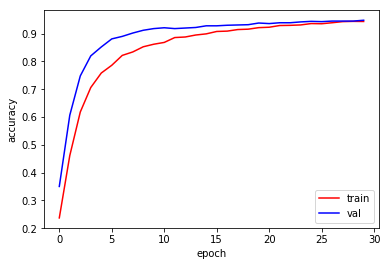

In [452]:
draw_train_val(ht_5_v2.history)

In [453]:
print("train accuracy: " + str(ht_5_v2.history['acc'][-1]))
print("val accuracy: " + str(ht_5_v2.history['val_acc'][-1]))
print("test accuracy: " + str(model_5_v2.evaluate(test_X.reshape(test_X.shape[0], 28, 28), test_Y)[1]))

train accuracy: 0.943478803031
val accuracy: 0.947947949917
1004/1004 [==============================] - 0s 188us/step
test accuracy: 0.915338645418


In [464]:
###6###
def mod_v6(input_shape, drop):
    X_input = Input(input_shape)
    X = Reshape((28,28,1))(X_input)
    X = Conv2D(32, (5, 5), strides = (2, 2), kernel_initializer = glorot_uniform(seed=0))(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)
    X = Conv2D(64, (3, 3), strides = (1, 1), kernel_initializer = glorot_uniform(seed=0))(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)
    X = Flatten()(X)
    X = Dense(1024)(X)
    X = Dropout(drop)(X)
    X = Activation('tanh')(X)
    X = Dense(10)(X)
    X = Activation('softmax')(X)
    model = Model(inputs = X_input, outputs = X, name='mod_v6')
    return model

In [465]:
model_6 = mod_v6((28,28), 0.14)

In [466]:
model_6.compile(optimizer='adam', loss='mean_squared_logarithmic_error', metrics=['accuracy'])

In [467]:
ht_6 = model_6.fit(train_X.reshape(train_X.shape[0], 28, 28), train_Y, validation_data=(val_X.reshape(val_X.shape[0], 28, 28), val_Y), epochs = 30, batch_size = 100)

Train on 7997 samples, validate on 999 samples
Epoch 1/30
7997/7997 [==============================] - 8s 981us/step - loss: 0.0206 - acc: 0.7038 - val_loss: 0.0066 - val_acc: 0.9179
Epoch 2/30
7997/7997 [==============================] - 2s 247us/step - loss: 0.0069 - acc: 0.9148 - val_loss: 0.0030 - val_acc: 0.9670
Epoch 3/30
7997/7997 [==============================] - 2s 232us/step - loss: 0.0044 - acc: 0.9452 - val_loss: 0.0021 - val_acc: 0.9720
Epoch 4/30
7997/7997 [==============================] - 2s 238us/step - loss: 0.0034 - acc: 0.9575 - val_loss: 0.0015 - val_acc: 0.9820
Epoch 5/30
7997/7997 [==============================] - 2s 240us/step - loss: 0.0026 - acc: 0.9669 - val_loss: 0.0012 - val_acc: 0.9850
Epoch 6/30
7997/7997 [==============================] - 2s 238us/step - loss: 0.0022 - acc: 0.9715 - val_loss: 0.0015 - val_acc: 0.9820
Epoch 7/30
7997/7997 [==============================] - 2s 234us/step - loss: 0.0019 - acc: 0.9749 - val_loss: 0.0011 - val_acc: 0.9860
E

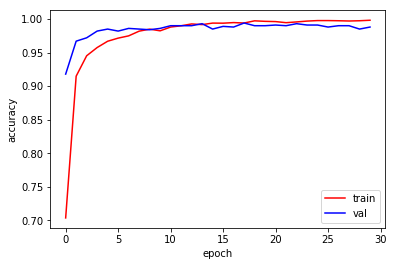

In [468]:
draw_train_val(ht_6.history)

In [469]:
print("train accuracy: " + str(ht_6.history['acc'][-1]))
print("val accuracy: " + str(ht_6.history['val_acc'][-1]))
print("test accuracy: " + str(model_6.evaluate(test_X.reshape(test_X.shape[0], 28, 28), test_Y)[1]))

train accuracy: 0.9981242984
val accuracy: 0.987987989539
1004/1004 [==============================] - 0s 169us/step
test accuracy: 0.977091633704
